In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy #x
from sqlalchemy.ext.automap import automap_base #x
from sqlalchemy.orm import Session #x
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

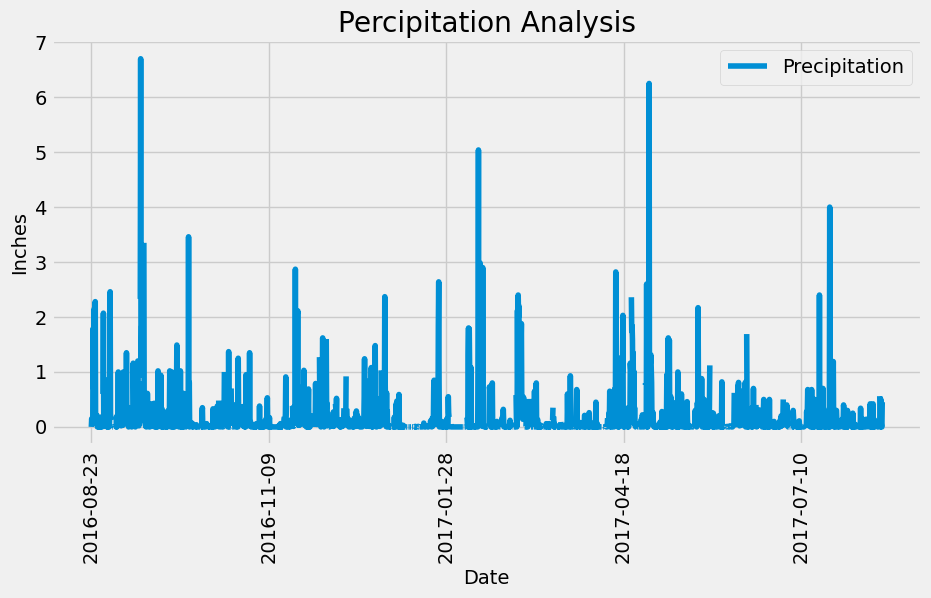

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= (dt.date(2017, 8, 23) - dt.timedelta(days=365))).order_by(Measurement.date).all()

# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
one_year_prior = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
percipitation_df = pd.DataFrame(precipitation_data, columns =["Date","Precipitation"])
percipitation_df.set_index("Date", inplace=True)
percipitation_df.head()

# Sort the dataframe by date
sorted_percipitation_df = percipitation_df.sort_values(by="Date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
sorted_percipitation_df.plot(title="Percipitation Analysis", figsize=(10,5))
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
percipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = func.min(Measurement.tobs)
max_temp = func.max(Measurement.tobs)
avg_temp = func.avg(Measurement.tobs)

min_max_avg_temp = session.query(min_temp, max_temp, avg_temp).filter(Measurement.station == "USC00519281").order_by(Measurement.date).all()

print(f"Lowest Temperature: {min_max_avg_temp[0][0]}")
print(f"Average Temperature: {min_max_avg_temp[0][2]}")
print(f"Highest Temperature: {min_max_avg_temp[0][1]}")


Lowest Temperature: 54.0
Average Temperature: 71.66378066378067
Highest Temperature: 85.0


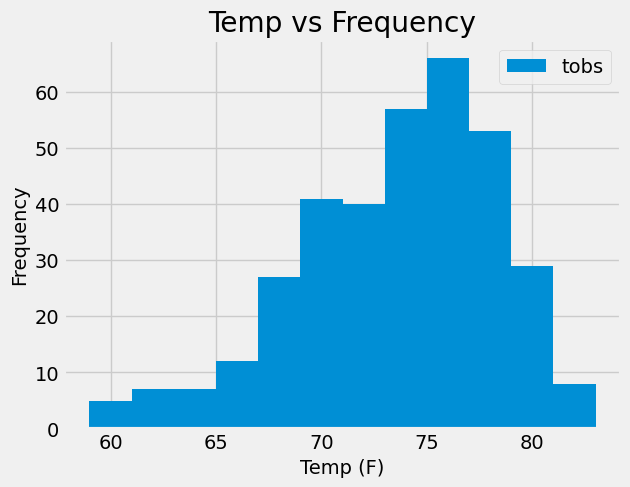

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temp_observ = session.query(Measurement.tobs).filter(Measurement.date >= '2016-08-23').filter(Measurement.station == "USC00519281").order_by(Measurement.date).all()
tmp_obs_df = pd.DataFrame(temp_observ, columns=["tobs"])
tmp_obs_df.plot.hist(bins=12, title ="Temp vs Frequency")
plt.xlabel("Temp (F)")
plt.legend(loc="best")
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()